7.27 Estimating a time-dependent covariance scaling

In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [2]:
np.random.seed(1)

n = 10
F = np.random.randn(10, 10)
Sigma = F.T@F
T = 10
a = np.array([0.2, 0.1, 0.2, 0.4, 0.8, 1.0, 1.0, 0.8, 0.7, 0.8])
x = np.zeros((n, T))
y = np.zeros((n, T))
for t in range(T):
    x[:, t] = np.random.multivariate_normal(np.zeros(n), a[t]*Sigma)
    y[:, t] = np.random.multivariate_normal(np.zeros(n), a[t]*Sigma)

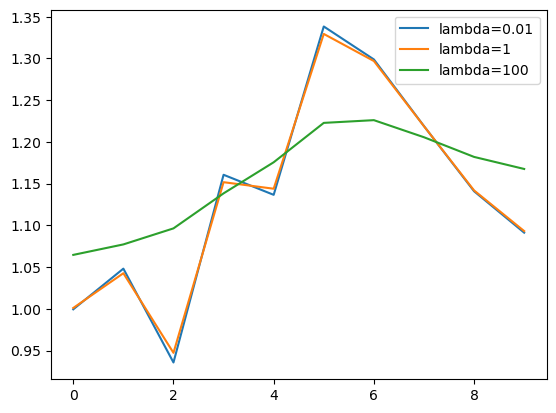

In [3]:
log_inv_a = cp.Variable(T)
a_est = np.zeros((3,T))
for iter, Lambda in enumerate([0.01, 1, 100]):
    objective = cp.Minimize(
        - n / 2 * cp.sum(log_inv_a) 
        + 0.5 * cp.sum([x.T[t] @ np.linalg.inv(Sigma) @ x.T[t] * cp.power(cp.exp(log_inv_a[t]), n) for t in range(T)])
        + Lambda * cp.sum_squares(log_inv_a[1:] - log_inv_a[:-1])
    )
    constraints = []
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    a_est[iter] = 1 / np.exp(log_inv_a.value)
plt.plot(a_est.T, label=['lambda=0.01','lambda=1','lambda=100'])
plt.legend()
plt.show()

In [4]:
def nll(y, a): # negtive log likelihood
    from scipy.stats import multivariate_normal
    return - np.sum([multivariate_normal(np.zeros(T), a[t] * Sigma).logpdf(y.T[t]) for t in range(T)])

In [5]:
for a in a_est:
    print(nll(y, a))

179.01892498957406
179.0196921916413
180.09034312216733


In [7]:
for a in a_est:
    print(nll(x, a))

175.66735084429266
175.73128863812894
177.46552017631214
